In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [31]:
file_path ="C:\\Users\\sujin\\Downloads\\energydata_complete.csv"
data = pd.read_csv(file_path)
data = data.drop(['rv1', 'rv2'], axis=1)




In [33]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:", non_numeric_cols)
for col in non_numeric_cols:
    print(f"Unique values in {col}:", data[col].unique())  # Check unique values

# Convert to numeric (forcing conversion)
data = data.apply(pd.to_numeric, errors='coerce')



Non-Numeric Columns: Index(['date'], dtype='object')
Unique values in date: ['2016-01-11 17:00:00' '2016-01-11 17:10:00' '2016-01-11 17:20:00' ...
 '2016-05-27 17:40:00' '2016-05-27 17:50:00' '2016-05-27 18:00:00']


In [35]:
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 date           19735
Appliances         0
lights             0
T1                 0
RH_1               0
T2                 0
RH_2               0
T3                 0
RH_3               0
T4                 0
RH_4               0
T5                 0
RH_5               0
T6                 0
RH_6               0
T7                 0
RH_7               0
T8                 0
RH_8               0
T9                 0
RH_9               0
T_out              0
Press_mm_hg        0
RH_out             0
Windspeed          0
Visibility         0
Tdewpoint          0
dtype: int64


In [37]:
data.fillna(data.median(), inplace=True)
print(data.dtypes)


date           float64
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object


In [39]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(data))

threshold = 3  

data_cleaned = data[(z_scores < threshold).all(axis=1)]

print(f"Original Size: {data.shape}, Cleaned Size: {data_cleaned.shape}")


Original Size: (19735, 27), Cleaned Size: (0, 27)


In [41]:

X = data_cleaned.drop(columns=['Appliances'])  
y = data_cleaned['Appliances']  


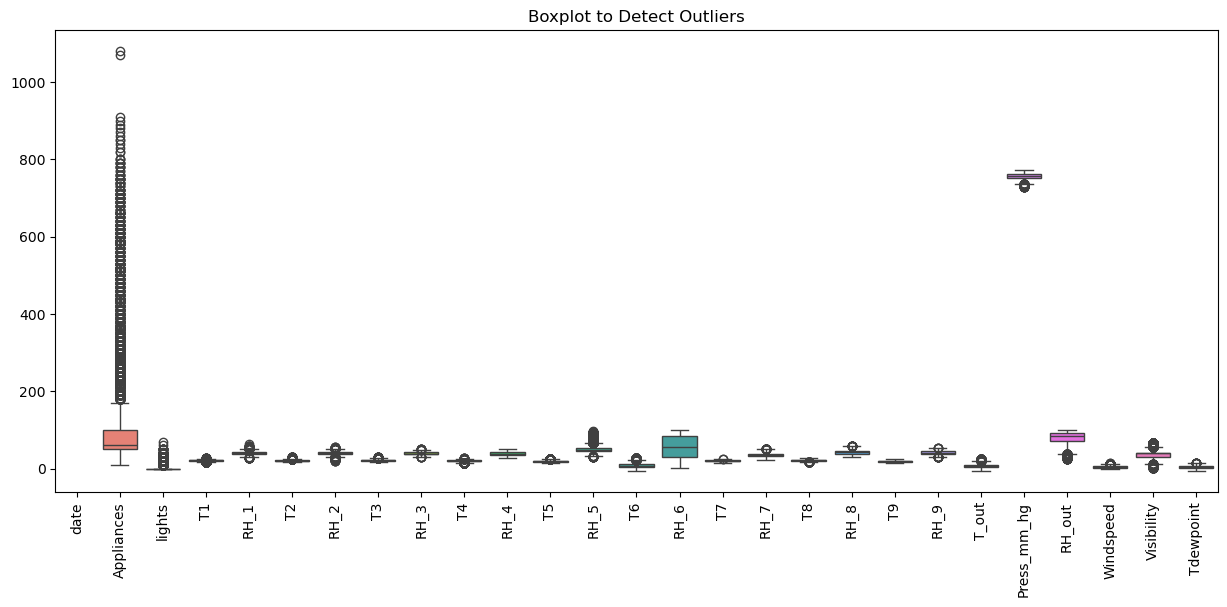

In [43]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Boxplot to Detect Outliers")
plt.show()


In [45]:
z_scores = np.abs(zscore(data))
threshold = 4  
data_cleaned = data[(z_scores < threshold).all(axis=1)]

print(f"New dataset size: {data_cleaned.shape}")

New dataset size: (0, 27)


In [47]:
X = data.drop(['Appliances'], axis=1)  # Features
y = data['Appliances'] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

C:\Users\sujin\OneDrive\Documents\New folder\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\sujin\OneDrive\Documents\New folder\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\sujin\OneDrive\Documents\New folder\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Model Performance:
Mean Absolute Error (MAE): 31.799290600456043
Root Mean Squared Error (RMSE): 67.58681500637422
R-squared (R²): 0.543525933783476


C:\Users\sujin\AppData\Local\Temp\ipykernel_24592\2056671223.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


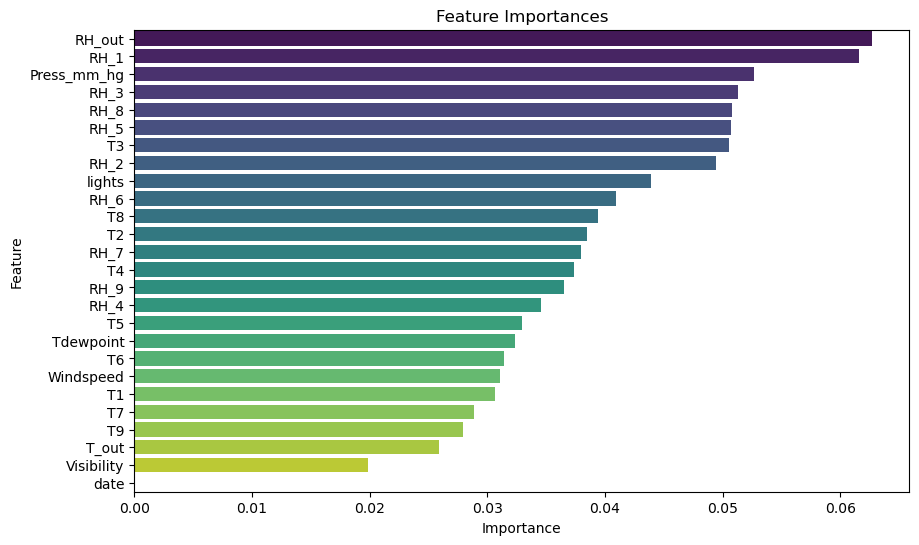

In [55]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Feature importance analysis
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances')
plt.show()

   Actual  Predicted
0      40       53.0
1      90      130.0
2      50       48.7
3      50       71.5
4      70       65.5
5     120      118.1
6     120      136.5
7      70       86.7
8      50       51.3
9      70       91.7


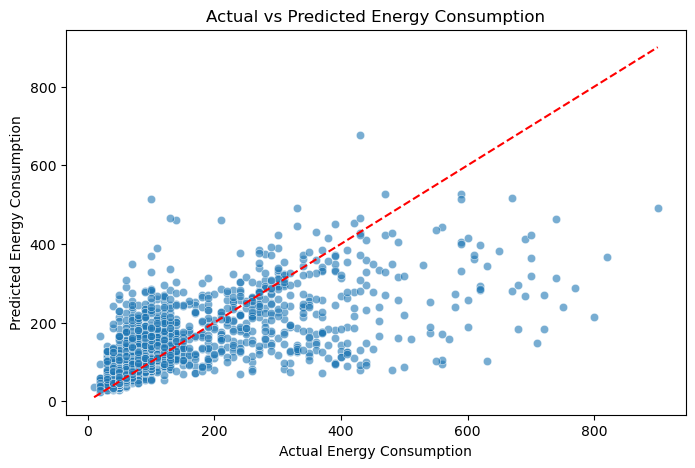

In [58]:
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results_df.head(10))
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')

# Diagonal reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.show()